In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
import re
plt.style.use('ggplot')

In [33]:
df = pd.read_csv('EDA/DBa_to_csv/EDA.csv')

df.head()

,id_allocine,title,release_year,original_title,genres,duration_m,synopsis,poster_link,release_date,societies,budget,nationality,directors,all_director_oscars,all_actor_oscars,actor_celebs,entries
0,5818,Titanic,1998,NaN,"Drame,Romance",194,"Southampton, 10 avril 1912. Le paquebot le plu...",https://fr.web.img6.acsta.net/c_310_420/pictur...,1998-01-07,Industrial Light & Magic (ILM)|Paramount Pictu...,200000000$,U.S.A.,James Cameron,NaN,NaN,8.0,498212
1,7118,Les convoyeurs attendent,1999,NaN,Comédie dramatique,94,Roger Closset habite un petit pavillon de la b...,https://fr.web.img2.acsta.net/c_310_420/pictur...,1999-09-15,Centre de Cinéma et de l'Audiovisuel de la Com...,0,Belgique,Benoît Mariage,NaN,NaN,NaN,52649
2,9906,Be Happy,2008,NaN,Comédie,118,"Institutrice, Poppy est une jeune femme aussi ...",https://fr.web.img5.acsta.net/c_310_420/medias...,2008-08-27,Miramax Films|UK Film Council|Potboiler Produc...,0,Grande-Bretagne,Mike Leigh,NaN,NaN,NaN,110442
3,10675,Cornouaille,2012,NaN,Drame,96,Odile est une jeune femme indépendante et rati...,https://fr.web.img6.acsta.net/c_310_420/medias...,2012-08-15,France 2 Cinéma|TF1 International|Move Movie|U...,0,France,Anne Le Ny,NaN,NaN,NaN,128162
4,10862,Le Roi Lion,1994,NaN,"Aventure,Animation,Famille,Comédie musicale",89,Sur les Hautes terres d’Afrique règne un lion ...,https://fr.web.img6.acsta.net/c_310_420/pictur...,1994-11-23,Gaumont Buena Vista International (GBVI)|IMAX ...,45000000$,U.S.A.,"Roger Allers,Rob Minkoff",NaN,NaN,NaN,210904


In [34]:
df.shape

(3789, 17)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3789 entries, 0 to 3788
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_allocine          3789 non-null   int64  
 1   title                3789 non-null   object 
 2   release_year         3789 non-null   int64  
 3   original_title       0 non-null      float64
 4   genres               3789 non-null   object 
 5   duration_m           3789 non-null   int64  
 6   synopsis             3789 non-null   object 
 7   poster_link          3789 non-null   object 
 8   release_date         3789 non-null   object 
 9   societies            3789 non-null   object 
 10  budget               3789 non-null   object 
 11  nationality          3789 non-null   object 
 12  directors            3789 non-null   object 
 13  all_director_oscars  11 non-null     float64
 14  all_actor_oscars     539 non-null    float64
 15  actor_celebs         459 non-null    f

In [36]:
df.describe()

,id_allocine,release_year,original_title,duration_m,all_director_oscars,all_actor_oscars,actor_celebs,entries
count,3789.000000,3789.000000,0.0,3789.000000,11.000000,539.000000,459.000000,3.789000e+03
mean,158853.259699,2011.823964,NaN,107.078913,1.181818,1.274583,52.387800,3.444926e+05
std,88606.058067,6.742973,NaN,18.141045,0.404520,0.567656,45.142592,4.138016e+05
min,5818.000000,1968.000000,NaN,0.000000,1.000000,1.000000,1.000000,7.600000e+01
25%,58275.000000,2006.000000,NaN,94.000000,1.000000,1.000000,23.000000,1.213120e+05
50%,173048.000000,2012.000000,NaN,104.000000,1.000000,1.000000,38.000000,2.012420e+05
75%,236733.000000,2017.000000,NaN,117.000000,1.000000,1.000000,75.500000,3.842390e+05
max,325052.000000,2024.000000,NaN,220.000000,2.000000,4.000000,409.000000,3.906694e+06


### Nombre de films sorties / an 

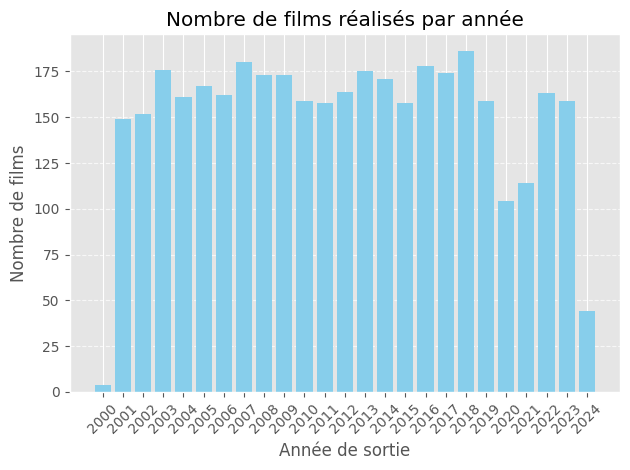

In [37]:
df_filtered = df[df['release_year'] >= 2000]

films_par_annee = df_filtered['release_year'].value_counts().sort_index()

# Créer un histogramme
plt.bar(films_par_annee.index, films_par_annee.values, color='skyblue')
plt.xlabel('Année de sortie')
plt.ylabel('Nombre de films')
plt.title('Nombre de films réalisés par année')
plt.xticks(films_par_annee.index, rotation=45)  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ajout d'une grille en arrière-plan
plt.tight_layout()  # Ajuster la disposition pour éviter la superposition des étiquettes
plt.show()

### Nombres d'entrées pour les 10 meilleurs films 

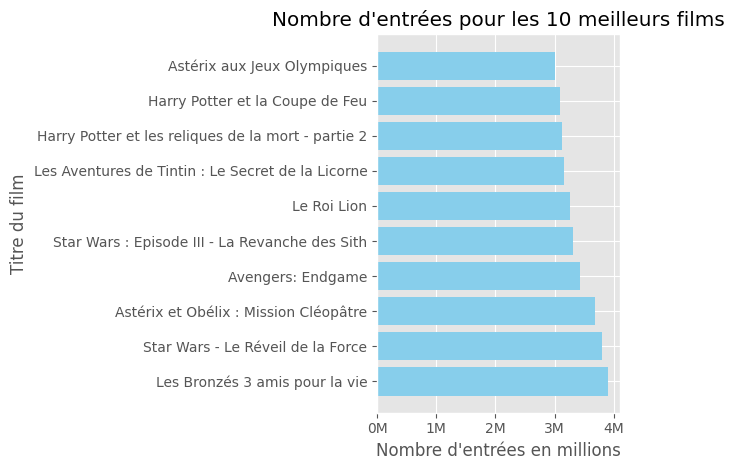

In [38]:

# Sélectionner les 10 films avec le plus grand nombre d'entrées
top_10_films = df.nlargest(10, 'entries')

# Créer un histogramme du nombre d'entrées pour les 10 meilleurs films
plt.barh(top_10_films['title'], top_10_films['entries'], color='skyblue')  # Utilisation de barh pour inverser les axes
plt.xlabel('Nombre d\'entrées en millions')  # Inversion de l'étiquette de l'axe des x
plt.ylabel('Titre du film')  # Inversion de l'étiquette de l'axe des y
plt.title('Nombre d\'entrées pour les 10 meilleurs films')

# Formatter les étiquettes de l'axe des abscisses pour afficher les valeurs en millions
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x / 1e6)))
plt.tight_layout()
plt.show()

### Nationalité du film pour les 10 meilleurs films 

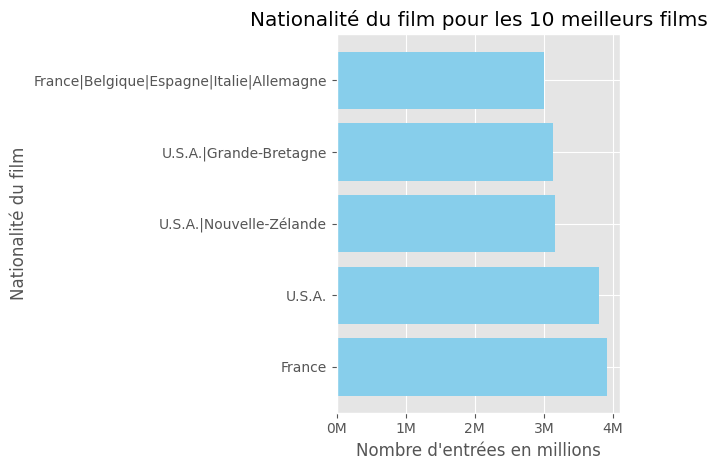

In [39]:
# nationality

# Sélectionner les 10 films avec le plus grand nombre d'entrées
top_10_films = df.nlargest(10, 'entries')

# Créer un histogramme du nombre d'entrées pour les 10 meilleurs films
plt.barh(top_10_films['nationality'], top_10_films['entries'], color='skyblue')  # Utilisation de barh pour inverser les axes
plt.xlabel('Nombre d\'entrées en millions')  # Inversion de l'étiquette de l'axe des x
plt.ylabel('Nationalité du film')  # Inversion de l'étiquette de l'axe des y
plt.title('Nationalité du film pour les 10 meilleurs films')

# Formatter les étiquettes de l'axe des abscisses pour afficher les valeurs en millions
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x / 1e6)))

plt.tight_layout()
plt.show()

### Analyse de la colonne 'genre'

In [40]:
# nombre de valeurs uniques pour la colonne genre

df['genres'].nunique()


400

### Nettoyage des colonnes actor_celebs, all_director_oscars, all_actor_oscars

In [41]:
# Remplacer les Nan par 0 dans actor_celebs, all_director_oscars, all_actor_oscars	

df['actor_celebs'].fillna(0)

df['all_director_oscars'].fillna(0)

df['all_actor_oscars'].fillna(0)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3784    0.0
3785    0.0
3786    0.0
3787    0.0
3788    0.0
Name: all_actor_oscars, Length: 3789, dtype: float64

### Analyse de la colonne 'directors'

In [42]:
#  valeurs uniques pour directors

df['directors'].nunique()

1795

In [43]:
# Films par réalisateurs   

films_par_realisateur = df['directors'].value_counts()
films_par_realisateur

directors
Woody Allen         18
Steven Spielberg    18
Ridley Scott        16
Clint Eastwood      16
François Ozon       16
                    ..
Afonso Poyart        1
Christian Rivers     1
Eli Craig            1
Tom Hanks            1
Paola Cortellesi     1
Name: count, Length: 1795, dtype: int64

In [44]:
# top 50 des réalisateurs en proportion de films réalisés

top_50_realisateurs = films_par_realisateur.head(50)
top_50_realisateurs

directors
Woody Allen                     18
Steven Spielberg                18
Ridley Scott                    16
Clint Eastwood                  16
François Ozon                   16
Steven Soderbergh               13
M. Night Shyamalan              12
Antoine Fuqua                   11
Olivier Baroux                  11
Luc Besson                      10
Eric Lavaine                    10
Ken Loach                       10
Anne Fontaine                   10
Christopher Nolan               10
Tim Burton                      10
Michael Bay                     10
Cédric Klapisch                  9
Bruno Podalydès                  9
Patrice Leconte                  9
Claude Lelouch                   9
James Wan                        9
Ron Howard                       9
Pedro Almodóvar                  9
Jean Becker                      9
Jaume Collet-Serra               9
André Téchiné                    9
Quentin Dupieux                  8
Martin Scorsese                  8
Francis La

### Titres et années de sortie des derniers films des 5 réalisateurs qui ont produit le plus de films

In [45]:

top_5_realisateurs = films_par_realisateur.head(5)

derniers_films = []
for realisateur in top_5_realisateurs.index:
    dernier_film = df[df['directors'] == realisateur].sort_values(by='release_year', ascending=False).iloc[0]
    derniers_films.append((realisateur, dernier_film['title'], dernier_film['release_year']))

# Trier les résultats par année de sortie du dernier film
derniers_films.sort(key=lambda x: x[2])

# Afficher chaque élément de la liste sur une ligne distincte
for film in derniers_films:
    print(film)



('Woody Allen', 'Un jour de pluie à New York', 2019)
('Clint Eastwood', 'Cry Macho', 2021)
('Steven Spielberg', 'The Fabelmans', 2023)
('Ridley Scott', 'Napoléon', 2023)
('François Ozon', 'Mon Crime', 2023)


### Acteurs qui ont le plus joué

In [46]:
# # les trois colonnes 'start1', 'start2' et 'start3' en une seule série
# start_combined = pd.concat([df['start1'], df['start2'], df['start3']])

# # le nombre d'occurrences de chaque valeur combinée
# top_start_combined = start_combined.value_counts()

# # les valeurs combinées qui reviennent le plus souvent
# print("Les valeurs combinées qui reviennent le plus souvent :")
# print(top_start_combined.head(25))

### Relations entre directors et genres

In [47]:

# hypothèse nulle: pas de relation 
# hypothèse alternative: il y a relations entre les variables

In [48]:
# relation entre les genres de film et directors

colonne1 = df['directors']
colonne2 = df['genres']

# Créer un tableau de contingence à partir des colonnes catégorielles
contingence_table = pd.crosstab(colonne1, colonne2)

# Effectuer le test du chi2 d'indépendance
chi2, p_value, dof, expected = chi2_contingency(contingence_table)

# Afficher le résultat du test
print("Chi2:", chi2)
print("P-value:", p_value)


Chi2: 739365.4650937612
P-value: 8.289177124719231e-85


In [49]:
# # relation entre les genres de casting et directors

# colonne1 = df['directors']
# colonne2 = df['start1']

# # Créer un tableau de contingence à partir des colonnes catégorielles
# contingence_table = pd.crosstab(colonne1, colonne2)

# # Effectuer le test du chi2 d'indépendance
# chi2, p_value, dof, expected = chi2_contingency(contingence_table)

# # Afficher le résultat du test
# print("Chi2:", chi2)
# print("P-value:", p_value)

### Relation entre genres et entries

In [50]:


# Séparer les données en groupes pour chaque genre de film
grouped_data = [df[df['genres'] == genre]['entries'] for genre in df['genres'].unique()]

# Appliquer le test ANOVA
f_statistic, p_value = f_oneway(*grouped_data)

print("P-value :", p_value)



P-value : 1.4625427572281998e-92


### Relation entre societies et entries

In [51]:
# Séparer les données en groupes pour chaque genre de film
grouped_data = [df[df['societies'] == genre]['entries'] for genre in df['societies'].unique()]

# Appliquer le test ANOVA
f_statistic, p_value = f_oneway(*grouped_data)

print("P-value :", p_value)

P-value : 0.9954430186208193


### Merge les deux csv 

In [52]:
df_budget = pd.read_csv('EDA/DBa_to_csv/film.csv')


df['budget'].nunique()


#Nombre de zéro dans df 
zero_budget_rows = df[df['budget'] == '0']
nombre_lignes = zero_budget_rows.shape[0]
print(nombre_lignes)

1895


In [53]:


#Nettoyage des années 

# Fonction pour supprimer les parenthèses et les années
def remove_parentheses_and_years(film_title):
    return re.sub(r'\([^()]*\)', '', film_title)

# Appliquer la fonction à la colonne 'film'
df_budget['film'] = df_budget['film'].apply(remove_parentheses_and_years)

In [55]:
from fuzzywuzzy import fuzz

# Identifier les correspondances approximatives
# Utiliser la similarité de Levenshtein pour calculer la similitude entre les titres et les films
# Exemple: fuzzywuzzy

def find_matching_titles(title, films):
    for film in films:
        if fuzz.partial_ratio(title, film) >= 90:  # Ajustez ce seuil selon vos besoins
            return film
    return None

df['film_match'] = df['title'].apply(lambda x: find_matching_titles(x, df_budget['film']))

/home/utilisateur/Documents/dev_ia/NIAB/venv/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [56]:
df.head(50)

,id_allocine,title,release_year,original_title,genres,duration_m,synopsis,poster_link,release_date,societies,budget,nationality,directors,all_director_oscars,all_actor_oscars,actor_celebs,entries,film_match
0,5818,Titanic,1998,NaN,"Drame,Romance",194,"Southampton, 10 avril 1912. Le paquebot le plu...",https://fr.web.img6.acsta.net/c_310_420/pictur...,1998-01-07,Industrial Light & Magic (ILM)|Paramount Pictu...,200000000$,U.S.A.,James Cameron,NaN,NaN,8.0,498212,Titanic
1,7118,Les convoyeurs attendent,1999,NaN,Comédie dramatique,94,Roger Closset habite un petit pavillon de la b...,https://fr.web.img2.acsta.net/c_310_420/pictur...,1999-09-15,Centre de Cinéma et de l'Audiovisuel de la Com...,0,Belgique,Benoît Mariage,NaN,NaN,NaN,52649,None
2,9906,Be Happy,2008,NaN,Comédie,118,"Institutrice, Poppy est une jeune femme aussi ...",https://fr.web.img5.acsta.net/c_310_420/medias...,2008-08-27,Miramax Films|UK Film Council|Potboiler Produc...,0,Grande-Bretagne,Mike Leigh,NaN,NaN,NaN,110442,None
3,10675,Cornouaille,2012,NaN,Drame,96,Odile est une jeune femme indépendante et rati...,https://fr.web.img6.acsta.net/c_310_420/medias...,2012-08-15,France 2 Cinéma|TF1 International|Move Movie|U...,0,France,Anne Le Ny,NaN,NaN,NaN,128162,None
4,10862,Le Roi Lion,1994,NaN,"Aventure,Animation,Famille,Comédie musicale",89,Sur les Hautes terres d’Afrique règne un lion ...,https://fr.web.img6.acsta.net/c_310_420/pictur...,1994-11-23,Gaumont Buena Vista International (GBVI)|IMAX ...,45000000$,U.S.A.,"Roger Allers,Rob Minkoff",NaN,NaN,NaN,210904,Le Roi Lion
5,11295,Billy Elliot,2000,NaN,Comédie dramatique,110,Dans un petit village minier du Nord-Est de l'...,https://fr.web.img6.acsta.net/c_310_420/pictur...,2000-12-20,BBC Films|Working Title Films|StudioCanal|Tama...,5000000$,Grande-Bretagne,Stephen Daldry,NaN,NaN,NaN,200445,None
6,12791,La Planète des singes,1968,NaN,"Drame,Science Fiction",110,"Egaré dans l'espace-temps, un engin spatial am...",https://fr.web.img6.acsta.net/c_310_420/pictur...,1968-04-26,APJAC Productions|Swashbuckler Films|20th Cent...,6000000$,U.S.A.,Franklin J. Schaffner,NaN,NaN,NaN,175773,La Planète des singes - Suprématie
7,15681,Rencontre avec le dragon,2003,NaN,Aventure,109,"Félix a quinze ans. C'est encore un enfant, pa...",https://fr.web.img3.acsta.net/c_310_420/medias...,2003-08-06,France 3 Cinéma|Diaphana Films,"9,76000000€",France,Hélène Angel,NaN,NaN,NaN,77178,None
8,16591,Madagascar,2005,NaN,"Comédie,Aventure,Animation",86,"Lorsqu'un lion, un zèbre, une girafe, un hippo...",https://fr.web.img4.acsta.net/c_310_420/medias...,2005-06-22,United International Pictures (UIP)|DreamWorks...,75000000$,U.S.A.,"Eric Darnell,Tom McGrath",NaN,NaN,NaN,874013,Les Pingouins de Madagascar
9,18478,Mary à tout prix,1998,NaN,Comédie,119,"Ted, le",https://fr.web.img6.acsta.net/c_310_420/pictur...,1998-11-11,Les Acacias|20th Century Studios,23000000$,U.S.A.,"Peter Farrelly,Bobby Farrelly",NaN,NaN,NaN,573347,None


In [57]:
df[['title', 'film_match']]

,title,film_match
0,Titanic,Titanic
1,Les convoyeurs attendent,None
2,Be Happy,None
3,Cornouaille,None
4,Le Roi Lion,Le Roi Lion
...,...,...
3784,Le Royaume de Kensuke,None
3785,Opération Portugal 2: la vie de château,None
3786,Tombés du camion,None
3787,Il reste encore demain,None


In [61]:
nombre_none = df['film_match'].isnull().sum()
nombre_none

# Fusionner les datasets en utilisant les correspondances trouvées comme clé de fusion
merged_data = pd.merge(df, df_budget, how='left', left_on='film_match', right_on='film')
merged_data.to_csv('merged_data.csv', index=False)

In [67]:
df_merged = pd.read_csv('merged_data.csv')

df_merged[['title', 'budget_x', 'budget_y']].head(100)

# Sélectionner les lignes où 'budget_x' est égal à '0' et 'budget_y' n'est pas NaN
resultats = df_merged.query("budget_x == '0' and budget_y.notnull()")['title']

# Afficher les titres correspondants
print(resultats)

113                            Ali
127                          Irène
149     Le Baiser mortel du dragon
210                     Scooby-Doo
252                      Le Boulet
                   ...            
3741                   Equalizer 3
3742                     La Petite
3744                     Scream VI
3769                         Smile
3777               Kung Fu Panda 4
Name: title, Length: 384, dtype: object


In [69]:
# Remplacer les valeurs '0' dans la colonne 'budget_x' par les valeurs de la colonne 'budget_y' lorsque 'budget_y' n'est pas None
df_merged['budget_x'] = df_merged.apply(lambda row: row['budget_y'] if row['budget_x'] == '0' and row['budget_y'] is not None else row['budget_x'], axis=1)


In [71]:
df_merged.head()

,id_allocine,title,release_year,original_title,genres,duration_m,synopsis,poster_link,release_date,societies,budget_x,nationality,directors,all_director_oscars,all_actor_oscars,actor_celebs,entries,film_match,film,budget_y
0,5818,Titanic,1998,NaN,"Drame,Romance",194,"Southampton, 10 avril 1912. Le paquebot le plu...",https://fr.web.img6.acsta.net/c_310_420/pictur...,1998-01-07,Industrial Light & Magic (ILM)|Paramount Pictu...,200000000$,U.S.A.,James Cameron,NaN,NaN,8.0,498212,Titanic,Titanic,200 000 000 $
1,7118,Les convoyeurs attendent,1999,NaN,Comédie dramatique,94,Roger Closset habite un petit pavillon de la b...,https://fr.web.img2.acsta.net/c_310_420/pictur...,1999-09-15,Centre de Cinéma et de l'Audiovisuel de la Com...,NaN,Belgique,Benoît Mariage,NaN,NaN,NaN,52649,NaN,NaN,NaN
2,9906,Be Happy,2008,NaN,Comédie,118,"Institutrice, Poppy est une jeune femme aussi ...",https://fr.web.img5.acsta.net/c_310_420/medias...,2008-08-27,Miramax Films|UK Film Council|Potboiler Produc...,NaN,Grande-Bretagne,Mike Leigh,NaN,NaN,NaN,110442,NaN,NaN,NaN
3,10675,Cornouaille,2012,NaN,Drame,96,Odile est une jeune femme indépendante et rati...,https://fr.web.img6.acsta.net/c_310_420/medias...,2012-08-15,France 2 Cinéma|TF1 International|Move Movie|U...,NaN,France,Anne Le Ny,NaN,NaN,NaN,128162,NaN,NaN,NaN
4,10862,Le Roi Lion,1994,NaN,"Aventure,Animation,Famille,Comédie musicale",89,Sur les Hautes terres d’Afrique règne un lion ...,https://fr.web.img6.acsta.net/c_310_420/pictur...,1994-11-23,Gaumont Buena Vista International (GBVI)|IMAX ...,45000000$,U.S.A.,"Roger Allers,Rob Minkoff",NaN,NaN,NaN,210904,Le Roi Lion,Le Roi Lion,250 000 000 $
